In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("News Train.csv")

In [3]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,mumbai
1,154,german business confidence slides german busin...,mumbai
2,1101,bbc poll indicates economic gloom citizens in ...,mumbai
3,917,enron bosses in $168m payout eighteen former e...,mumbai
4,2034,car giant hit by mercedes slump a slump in pro...,mumbai


In [4]:
# Associate Category names with numerical index and save it in new column category_id
df['category_id'] = df['Category'].factorize()[0]

#View first 10 entries of category_id, as a sanity check
df['category_id'][0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: category_id, dtype: int64

In [5]:
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

In [6]:
category_id_df

,Category,category_id
0,mumbai,0
336,delhi,1
609,kolkata,2
883,lucknow,3
1229,chandigarh,4


In [7]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

In [8]:
id_to_category

{0: 'mumbai', 1: 'delhi', 2: 'kolkata', 3: 'lucknow', 4: 'chandigarh'}

In [9]:
df.sample(5, random_state=1)

,ArticleId,Text,Category,category_id
91,1381,world leaders gather to face uncertainty more ...,mumbai,0
1103,1214,old firm pair handed suspensions celtic s henr...,lucknow,3
909,1458,iranian misses israel match iranian striker va...,lucknow,3
683,1882,woolf murder sentence rethink plans to give mu...,kolkata,2
561,1167,u2 stars enter rock hall of fame singer bruce ...,delhi,1


In [10]:
df.groupby('Category').category_id.count()

Category
chandigarh    261
delhi         273
kolkata       274
lucknow       346
mumbai        336
Name: category_id, dtype: int64

<AxesSubplot:xlabel='Category'>

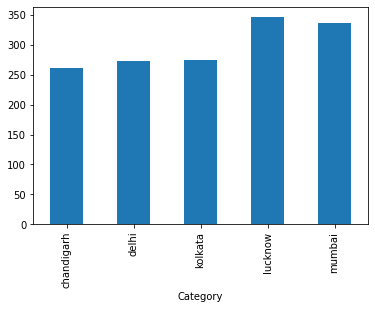

In [11]:
df.groupby('Category').category_id.count().plot.bar(ylim=0)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Text).toarray() # Remaps the words in the 1490 articles in the text column of 
                                                  # data frame into features (superset of words) with an importance assigned 
                                                  # based on each words frequency in the document and across documents

labels = df.category_id                           # represents the category of each of the 1490 articles

In [13]:
features.shape # How many features are there ? 

(1490, 9927)

In [14]:
category_to_id.items()

dict_items([('mumbai', 0), ('delhi', 1), ('kolkata', 2), ('lucknow', 3), ('chandigarh', 4)])

In [15]:
sorted(category_to_id.items())

[('chandigarh', 4),
 ('delhi', 1),
 ('kolkata', 2),
 ('lucknow', 3),
 ('mumbai', 0)]

In [19]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

In [20]:

CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [22]:
for model in models:
    model_name = model.__class__.__name__
    # create 5 models with different 20% test sets, and store their accuracies
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

In [23]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

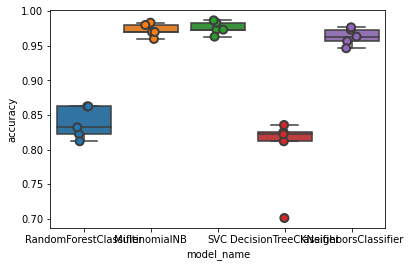

In [47]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [25]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.799329
KNeighborsClassifier      0.963087
MultinomialNB             0.972483
RandomForestClassifier    0.838255
SVC                       0.975839
Name: accuracy, dtype: float64

In [26]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.822148
1,RandomForestClassifier,1,0.812081
2,RandomForestClassifier,2,0.832215
3,RandomForestClassifier,3,0.862416
4,RandomForestClassifier,4,0.862416
5,MultinomialNB,0,0.969799
6,MultinomialNB,1,0.959732
7,MultinomialNB,2,0.983221
8,MultinomialNB,3,0.979866
9,MultinomialNB,4,0.969799


In [28]:
from sklearn.model_selection import train_test_split

model = SVC()

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
#y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro")) 

0.966564746346075
0.9685489664455712
0.965257967904406


Text(0.5, 15.0, 'Predicted')

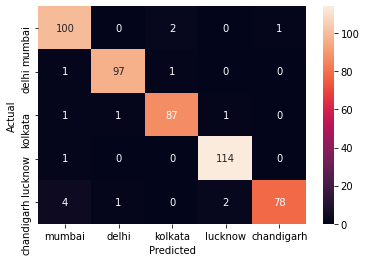

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### naive bayes

In [33]:
from sklearn.model_selection import train_test_split

model = MultinomialNB()

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
#y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro")) 

0.9578396737808144
0.9596236266044231
0.9566424004653091


Text(0.5, 15.0, 'Predicted')

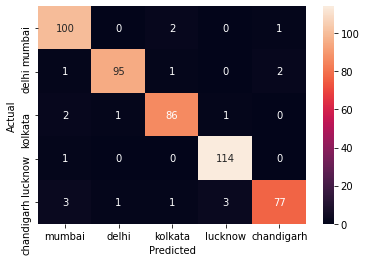

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## Random Forest classifier

In [36]:
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
#y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro")) 

0.8095373930221903
0.8699785583347197
0.8050487945027711


Text(0.5, 15.0, 'Predicted')

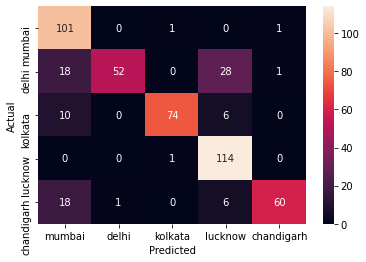

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## Decision tree

In [39]:
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier()
#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
#y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro")) 

0.8031143299244805
0.8052111913193174
0.8020073453227179


Text(0.5, 15.0, 'Predicted')

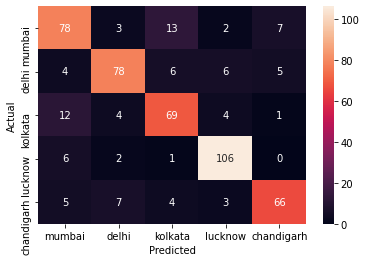

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## knn

In [42]:
from sklearn.model_selection import train_test_split

model =    KNeighborsClassifier()
#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
#y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.9616949205987556
0.9617673304993837
0.96178566636243


Text(0.5, 15.0, 'Predicted')

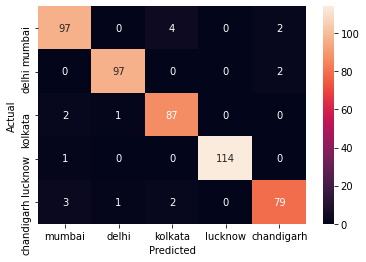

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')